In [1]:
import csv
import numpy as np
from scipy import stats
from scipy.stats import mode
import math
from numpy.linalg import inv, norm, pinv
import random
# I found it difficult ot de compress it in jupyter so I used Linux convert them into csv files
Tr = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_train.csv", "rb"), delimiter=",")
Tx = np.loadtxt(open("C:\\Users\\grbag\\Desktop\\Fall17\\my machine learning\\KNN\\data\\mnist_test.csv", "rb"), delimiter=",")
print("Size of the training set:-")
print(Tr.shape)
print("Size of the Testing set:-")
print(Tx.shape)
print("Size of the Testing Labes:-")


Size of the training set:-
(60000, 785)
Size of the Testing set:-
(10000, 785)
Size of the Testing Labes:-


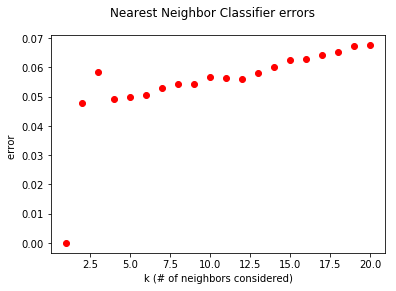

In [127]:
# the first columns are the labels and rest are pixels for the 
from scipy.stats import mode
TrD = Tr[:,1:]              # Training data
TrL = Tr[:,0]               # Training Labels
TxD = Tx[:,1:]              # Testing data
TxL = Tx[:,0] 
TrD=TrD[:10000,:]          # using smaller set due to computation time 
TrL=TrL[:10000]
 
k = []
calc = 1
while int(calc) < 21:
    k.append(calc)
    calc = int(calc) + 1     # k from 1 to 20
errork = np.zeros((20, 1))
imax = TrD.shape[0]  
for kk in k[:19]:
    pred= np.zeros((TrD.shape[0], 1))
    for i in range(0,TrD.shape[0]):
        tstimage=TrD[i,:]   # temp image
        Distance_matrix = np.einsum('ij, ij->i', (TrD-tstimage), (TrD-tstimage))
        nearestks = TrL[np.argsort(Distance_matrix)[1:(kk+1)]]  
        pred[i] = mode(nearestks)[0][0]
    crtpred= np.zeros((pred.shape[0], 1))  # intialize correct predictions array  
    for cnter in range(0,pred.shape[0]): 
        crtpred[cnter]=pred[cnter]==TrL[cnter]     # if prediction was correct crtprd= 1
        
    cpsum = np.sum(crtpred) #correct predection sum
    p = cpsum*100/imax      # Accuracy    
    errork[kk]=100-p
    del pred
# print("Error using Nearest Neighbor ")
# print(errork)

import matplotlib.pyplot as plt
%matplotlib inline
fig=plt.figure(1)
eee=errork/100
plt.plot(k,eee, 'ro',figure=fig)
fig.suptitle("Nearest Neighbor Classifier errors")
fig.axes[0].set_xlabel("k (# of neighbors considered)")
fig.axes[0].set_ylabel("error ");
# fig.axes[0].axis([0, max(k) + 1, 0, 1]);